# summarization

## application

headlines of a news artical 新闻标题

outlines of any document 文本大纲

abstract of a scientific article 文献摘要

snippets of a web page 网页摘要 on a search engine results page (google: title+link + 156 characters )

minutes of a meeting 会议记录 key points, decisions made, actions to be taken, and responser for each action.

biographies 生平

abridgments 简介 book, speech, doc

sound bites 音频节选

movie summaries 电影简介

chronologies 编年史

summary of email threads

## task

- single doc vs. multiple docs


- query-focused vs. generic

## algorithm

Type

- extractive: copy representative sentences in docs

- abstractive: generate new sentences by rephrasing and condensing the docs.

    mimic human summarization: read and understand the content first, then summarize in own words

steps

- content selection: sentence segmentation, sentence extraction

    - unsupervised: word sailence defined by tf-idf, topic signature (Mutual Information, log-likelihood ratio)

    - supervised: train a binary classifier (select sentence or not). features: position, length, word informativeness, cue phrases, cohesion

- information ordering: decide order of selected sentences

- sentence realization
    
    extractive: copy selected sentences

    abstractive: sentence simplification: e.g., remove non-essential phrases, fuse multiple sentences into one, fix problem in coherence.

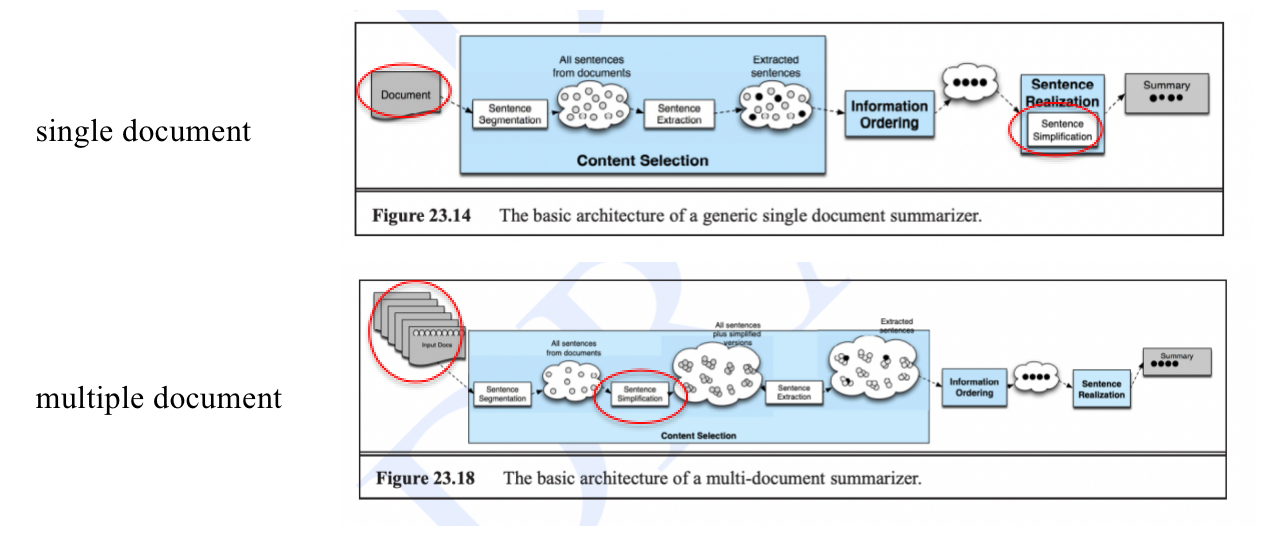

## history

| Year       | Era            | Extractive Summarization                                | Abstractive Summarization                |
|------------|----------------|--------------------------------------------------------|-----------------------------------------|
| 1950s-60s  | Rule-Based     | concept weight (Luhn, 1958) (1958)                                             |                                         |
| 1980s-90s  | Statistical    | Naive Bayes Classifier, Noisy Channel, LSA  |  |
| 2000s      | Graph-Based    | LexRank and TextRank<br>metric: ROUGE                      | Rule-based sentence compression and sentence fusion (Barzilay and McKeown, 2005), phrase merging (Bing et al., 2015)                                       |
| 2010s      | neural         | sparse coding. Seq2Seq with attention <br> dataset: CNN/Daily Mail, DUC  | Seq2Seq with attention                  |
| Late 2010s-Now | Transformer-Based |    BERT                                                | GPT, T5, BART, XSum dataset             |


## evaluation

- Extrinsic (task-based)
    
    Can you make the same decision using the summary as with the full text, but in less time

- Intrinsic (task-independent)

    - ROUGE: ROUGE-n, ROUGE-L, ROUGE-S,ROUGE-SU

    - pyramid method


baseline: random sentence, leading sentence.

ROUGE (Recall-Oriented Understudy for Gisting Evaluation)

inspred by BLEU (precision-oriented): what percentage n-grams from machine translation are covered by human reference translation

ROUGE: what percentage n-grams from human reference summary are covered by machine summary

$$
ROUGE-n = \frac{\underset{S\in Ref}{\sum} \underset{ngram \in S}{\sum} Count_{match}(ngram)}{\underset{S\in Ref}{\sum} \underset{ngram \in S}{\sum} Count(ngram)}
$$

ROUGE-L: longest common subsequence 

ROUGE-S, ROUGE-SU: number of skip bigrams between ref and candidate summary. skip bigrams is a pair of words in sentence order with any number of other words in between

## seq2seq with attention

tricks: copy, coverage, hierarchical, external knowledge

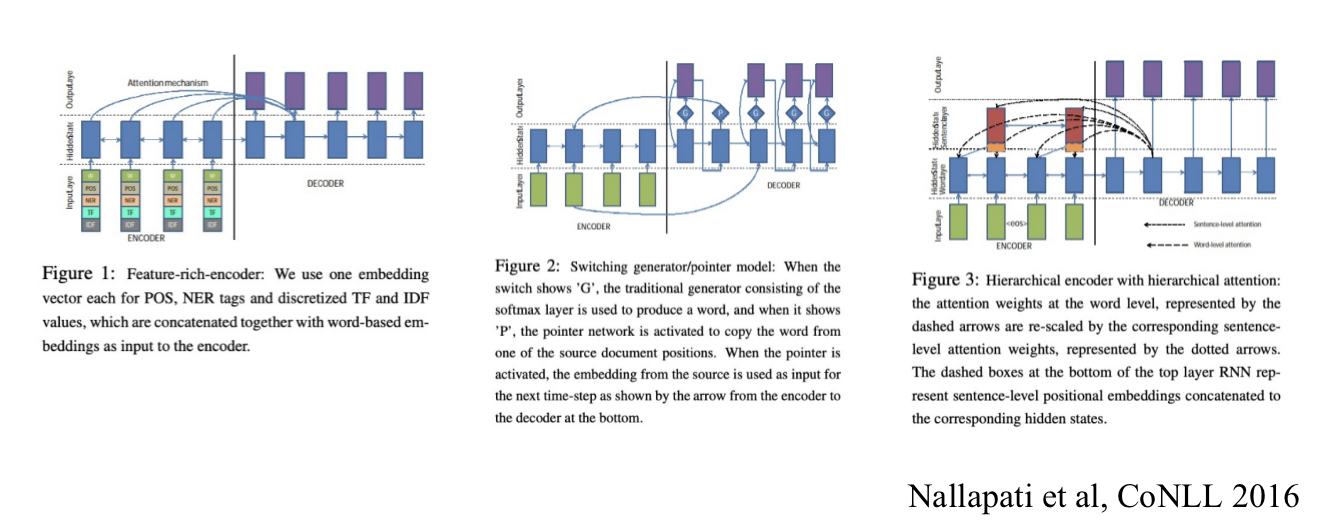

### sentence summarization

[A Neural Attention Model for Abstractive Sentence Summarization](https://arxiv.org/pdf/1509.00685.pdf)

sentence summarization task:

- input: sentence, a sequence of M words $x=x_1, ..., x_M$.

- output: summary, a sequence of N words (N < M) $y=y_1, ..., y_N$.

- objective: negative log-likelihood of a summary y given the input x, parameterized by $\theta$.

    $$
    L(\theta) = -\sum_{j=1}^J \log p(y^j|x^j; \theta)=-\sum_{j=1}^J\sum_{i=1}^{N-1}\log p(y_{i+1}^j|x^j, y_c; \theta)
    $$ 

    $J$: number of sentence-summary pairs

    $y_c=y_{[i-C+1,...,i]}$ is context for i+1 th word in summary, i.e., previous C words

**Attention-based Encoder**

- Input: a sentence $x=x_1, ..., x_M$.

- embedding layer: F and G are embedding matrix for sentence and context, respectively

    $$
    \tilde x = F^T x\quad \tilde y_c = G^T y
    $$

- context-to-sentence Mechanism: 

    $$
    a = \text{softmax}(\tilde x P \tilde y_c)\quad \bar x_i = \sum_{q=i-Q}^{i+Q}\tilde x_i /Q\\[1em]
    h_{enc} = a^T \bar x
    $$

    a is attention score

    P: weight matrix in bilinear score function

    Q: smoothing window size

- Output: A context vector of input sentence $h_{enc}$ 

autoregressive Decoder

- Input: summary context $y_c$ and context vector $h_{enc}$ from encoder 

- embedding layer: E is another embedding matrix for context

    $$
    \tilde y_c' = E^Ty_c
    $$

- hidden layer: compute hidden state of summary context

    $$h = tanh(U\tilde{y_c}')$$
    

- output layer

    $$
    p(y_{i+1} | y_c, x; \theta) = \text{softmax}(Vh + W h_{enc})
    $$

    V, W: weight matrix for hidden state of summary context and input sentence, respectively

- Output: The next word in the summary $y_{i+1}$ 

### sentence and word extraction

Cheng and Lapata 2016 Neural Summarization by Extracting Sentences and Words


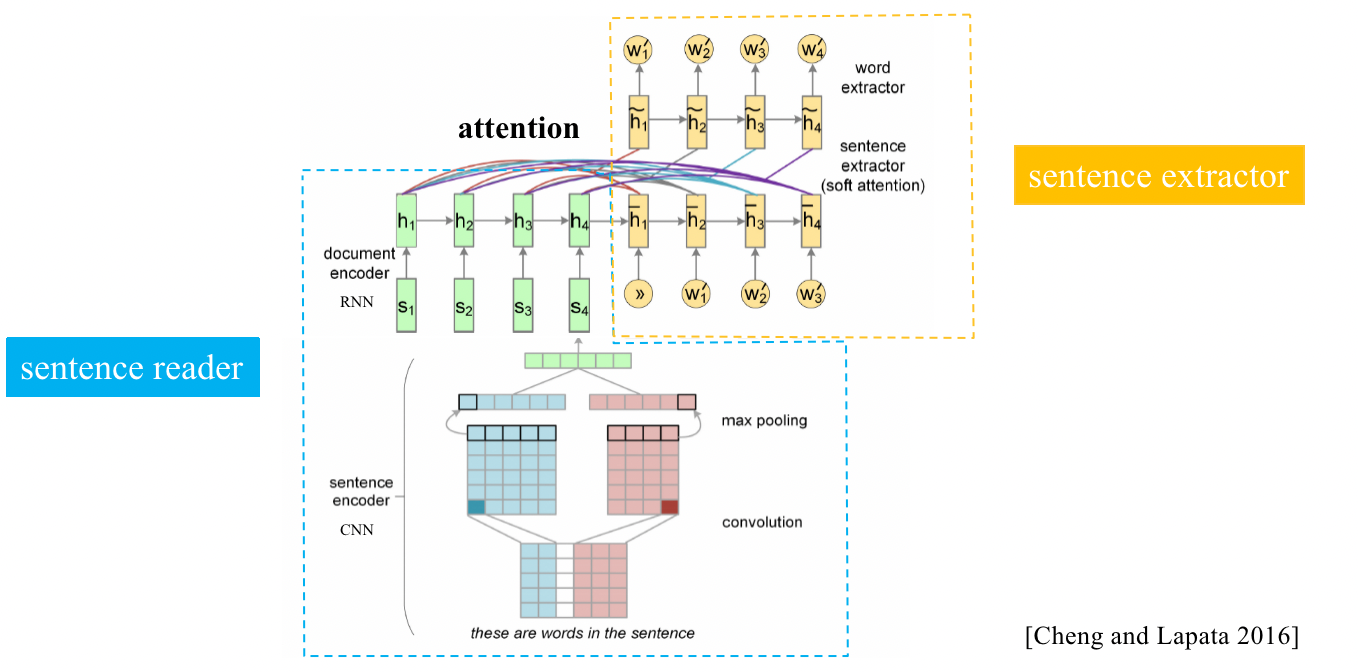

### copy mechanism: pointer-generator network

<img src="https://www.researchgate.net/publication/329464533/figure/fig4/AS:701043021205505@1544153089884/The-pointer-generator-network.ppm"/>

[Get To The Point: Summarization with Pointer-Generator Networks](https://arxiv.org/abs/1704.04368)

switch between extraction (copying directly from the source text) and abstraction (generating new text based on the learned context)

The "switch" is controlled by a gating mechanism, which is a learned function of the context. 

- Pointer Network: uses attention to point to an existing word in the source text, copying it to the output. useful when input document has OOV words

- Generator Network: a typical seq2seq with attention model that generates words from a fixed-size vocabulary. It uses the context it has learned from the source text to generate words one at a time.